In [84]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [23]:
picked = pd.read_csv("result.csv")
scaler = StandardScaler()

In [11]:
picked

,Date,osm_way_id,osm_start_node_id,osm_end_node_id,speed_mph_mean,Temperature,Humidity,WindSpeed
0,2020-02-01,627639479,5924962522,5924962521,24.905,38.566667,0.869667,4.766667
1,2020-02-01,627639479,5924962522,5924962521,24.843,38.566667,0.869667,4.766667
2,2020-02-01,627639479,5924962522,5924962521,25.362,38.566667,0.869667,4.766667
3,2020-02-01,455778913,42856931,5924962521,22.824,38.566667,0.869667,4.766667
4,2020-02-01,455778913,42856931,5924962521,24.945,38.566667,0.869667,4.766667
...,...,...,...,...,...,...,...,...
26782601,2020-02-29,5701026,464905115,42805266,40.696,31.200000,0.389600,16.600000
26782602,2020-02-29,5670236,42434175,3590689290,16.062,31.200000,0.389600,16.600000
26782603,2020-02-29,5670236,42434175,3590689290,16.198,31.200000,0.389600,16.600000
26782604,2020-02-29,5670236,42434175,3590689290,14.452,31.200000,0.389600,16.600000


In [12]:
picked["osm_end_node_id"].value_counts()

42778520      3191
42844306      3148
42468587      3070
42815983      3013
42431257      2823
              ... 
42956317         1
6291834699       1
42852221         1
42924499         1
5436369702       1
Name: osm_end_node_id, Length: 57043, dtype: int64

42778520

In [13]:
isPlace = picked["osm_end_node_id"] == 42778520
restruc = picked[isPlace]

In [14]:
restruc

,Date,osm_way_id,osm_start_node_id,osm_end_node_id,speed_mph_mean,Temperature,Humidity,WindSpeed
511259,2020-02-01,420895452,5335109935,42778520,17.276,38.566667,0.869667,4.766667
511260,2020-02-01,420895452,5335109935,42778520,14.639,38.566667,0.869667,4.766667
511261,2020-02-01,420895452,5335109935,42778520,13.210,38.566667,0.869667,4.766667
511262,2020-02-01,420895452,5335109935,42778520,13.213,38.566667,0.869667,4.766667
511263,2020-02-01,420895452,5335109935,42778520,14.485,38.566667,0.869667,4.766667
...,...,...,...,...,...,...,...,...
26452458,2020-02-29,223883749,5335109939,42778520,4.174,31.200000,0.389600,16.600000
26452459,2020-02-29,223883749,5335109939,42778520,7.550,31.200000,0.389600,16.600000
26452460,2020-02-29,223883749,5335109939,42778520,10.028,31.200000,0.389600,16.600000
26452461,2020-02-29,223883749,5335109939,42778520,4.670,31.200000,0.389600,16.600000


In [26]:
reb = restruc.drop(["osm_way_id", "osm_start_node_id", "osm_end_node_id", "Date"], axis = 1)

In [27]:
reb

,speed_mph_mean,Temperature,Humidity,WindSpeed
511259,17.276,38.566667,0.869667,4.766667
511260,14.639,38.566667,0.869667,4.766667
511261,13.210,38.566667,0.869667,4.766667
511262,13.213,38.566667,0.869667,4.766667
511263,14.485,38.566667,0.869667,4.766667
...,...,...,...,...
26452458,4.174,31.200000,0.389600,16.600000
26452459,7.550,31.200000,0.389600,16.600000
26452460,10.028,31.200000,0.389600,16.600000
26452461,4.670,31.200000,0.389600,16.600000


In [81]:
reb_scaled = pd.DataFrame(scaler.fit_transform(reb))

kmeans = KMeans(n_clusters = 40)
dbscan = DBSCAN()
kmeans.fit(reb_scaled)
dbscan.fit(reb_scaled)
clusters = kmeans.predict(reb_scaled)

reb_scaled["Clusters"] = clusters
reb_scaled["db_clusters"] = dbscan.labels_

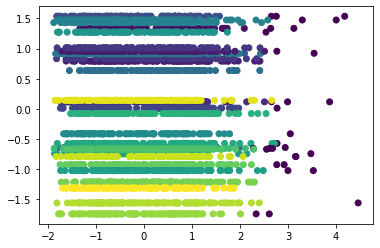

In [83]:
values = reb_scaled.values.tolist()
plt.scatter([x[0] for x in values], [x[2] for x in values] ,c=[x[5] for x in values])

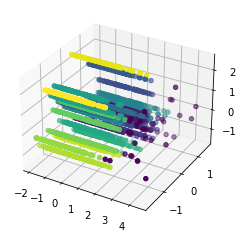

In [88]:
ax = plt.axes(projection='3d')
ax.scatter3D([x[0] for x in values], [x[2] for x in values], [x[3] for x in values] ,c=[x[5] for x in values])